In [1]:
input_file = "dream.out"

import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow_probability as tfp

import sys

sys.path.append("/Users/jay/Desktop/Bachelorarbeit/Implementation")
from src.execute_model import run_model_single_parameter_node
from src.construct_model import get_model


ndims = 7
dims = ["TT", "C0", "beta", "ETF", "FC", "FRAC", "K2"]
colors = sns.color_palette(n_colors=ndims)

testConfigPath = "/Users/jay/Desktop/Bachelorarbeit/test_config.json"
with open(testConfigPath, "r") as file:
    run_config = json.load(file)

configPath = run_config["configPath"]
basis = run_config["basis"]
model = get_model(configPath, basis)

start_date: 2004-01-01 00:00:00
start_date_predictions: 2005-01-01 00:00:00
end_date: 2006-01-01 00:00:00
simulation length: 365
full_data_range is 732 hours including spin_up_length of 366 hours
simulation_range is of length 366 hours


In [2]:
# Construct params
configurationObject = model.configurationObject
param_lower = []
param_upper = []
for param in configurationObject["parameters"]:
    # for now the Uniform distribution is only supported
    if param["distribution"] == "Uniform":
        param_lower.append(param["lower"])
        param_upper.append(param["upper"])
    else:
        raise NotImplementedError(
            f"Sorry, the distribution {param['distribution']} is not supported yet"
        )
param_lower = np.array(param_lower)
param_upper = np.array(param_upper)


def displot(i, data):
    # Plot sampled distribution
    fig = sns.displot(data, x=dims[i], kde=True, color=colors[i])

    # Plot distribution that is sampled from
    # uni = uniform(loc=param_lower[i], scale=param_upper[i] - param_lower[i])
    uni = tfp.distributions.Uniform(low=param_lower[i], high=param_upper[i])
    x = np.linspace(param_lower[i], param_upper[i], 25000)
    y = uni.prob(x)

    # Configuration
    plt.plot(x, y, label="pdf", color="grey")
    plt.title(f"PDF of parameter {dims[i]}")
    plt.show()

def boxplot(i, data):
    sns.boxplot(data, x=dims[i], color=colors[i])
    plt.title(f"Boxplot of parameter {dims[i]}")

In [3]:
samples = pd.read_csv(f"{input_file}")
samples

,TT,C0,beta,ETF,FC,FRAC,K2
0,0.502145,0.490508,2.999740,0.000073,50.017544,0.245814,0.049983
1,0.502145,0.490508,2.999740,0.000073,50.017544,0.245814,0.049983
2,0.502145,0.490508,2.999740,0.000073,50.017544,0.245814,0.049983
3,0.502145,0.490508,2.999740,0.000073,50.017544,0.245814,0.049983
4,0.502145,0.490508,2.999740,0.000073,50.017544,0.245814,0.049983
...,...,...,...,...,...,...,...
39995,0.529934,0.494031,2.999058,0.000020,50.018746,0.243442,0.049984
39996,0.529934,0.494031,2.999058,0.000055,50.018746,0.243442,0.049984
39997,0.529934,0.494013,2.999058,0.000057,50.018746,0.243488,0.049981
39998,0.529934,0.494013,2.999058,0.000057,50.018746,0.243488,0.049981


# Plotting

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

2024-05-23 22:15:58.706445: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-23 22:15:58.706468: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-23 22:15:58.706474: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-23 22:15:58.706492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-23 22:15:58.706504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


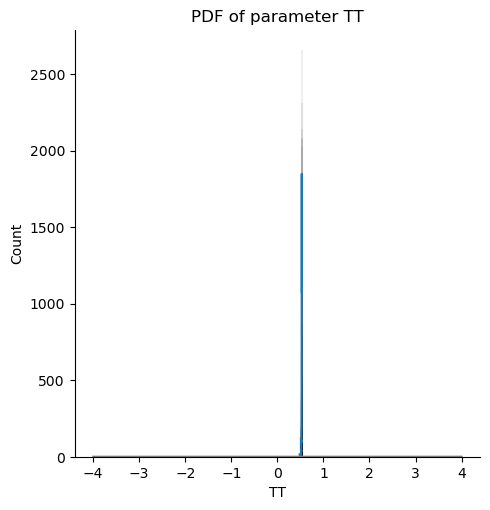

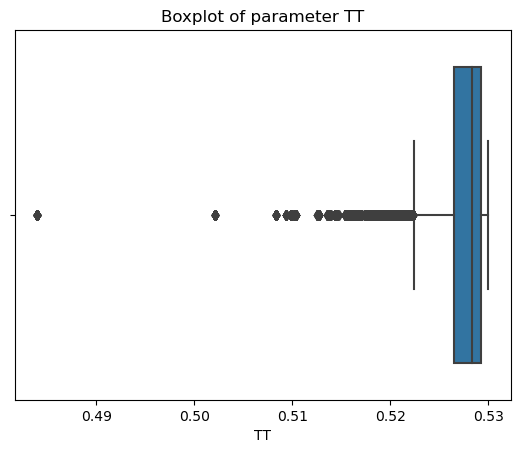

In [4]:
# Plot TT
displot(0, samples)
boxplot(0, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



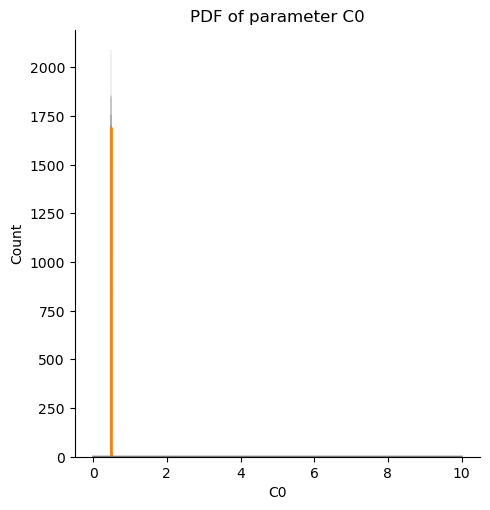

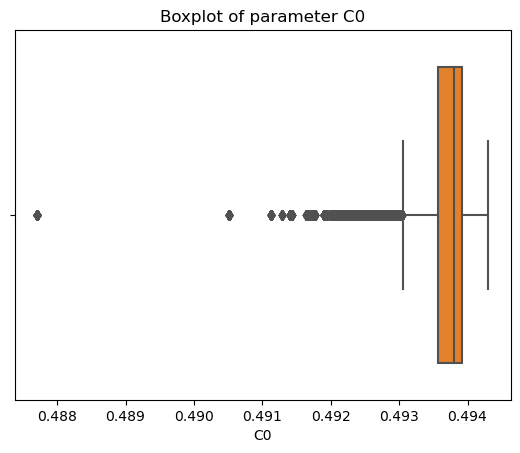

In [5]:
# Plot TT
displot(1, samples)
boxplot(1, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



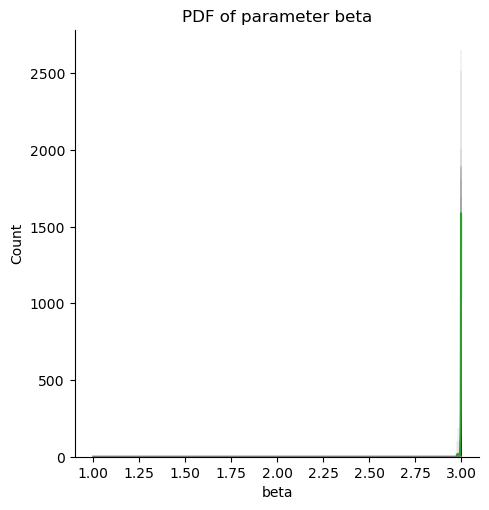

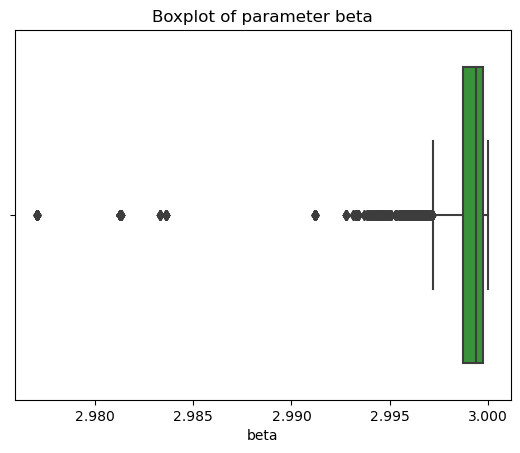

In [6]:
# Plot TT
displot(2, samples)
boxplot(2, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



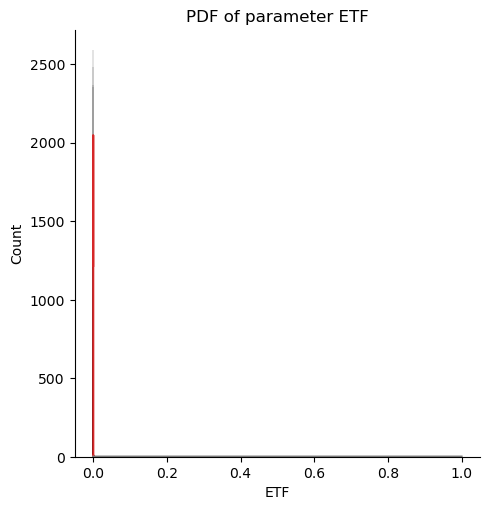

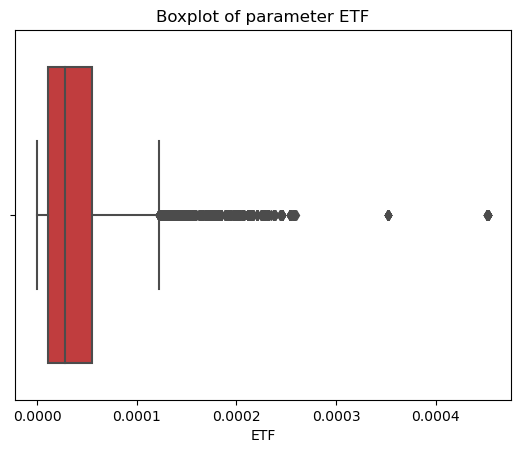

In [7]:
displot(3, samples)
boxplot(3, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



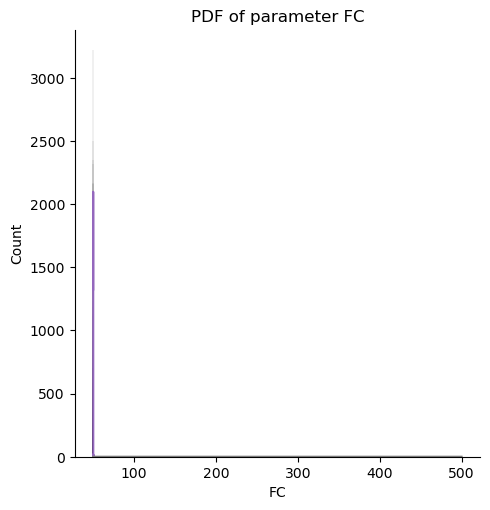

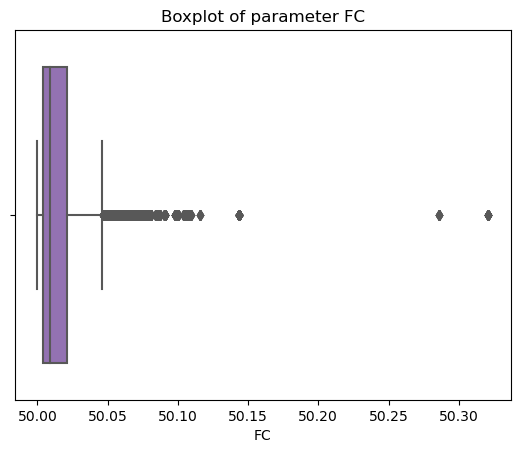

In [8]:
displot(4, samples)
boxplot(4, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



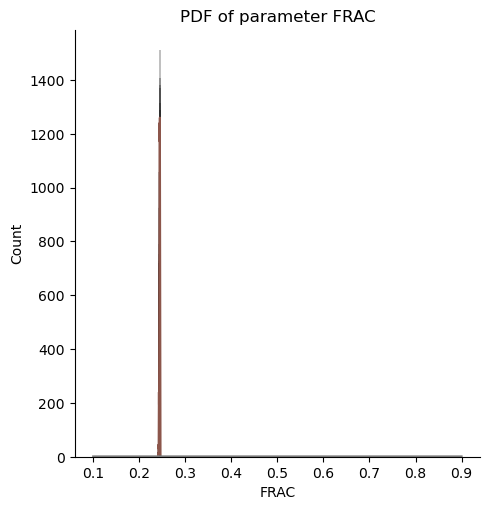

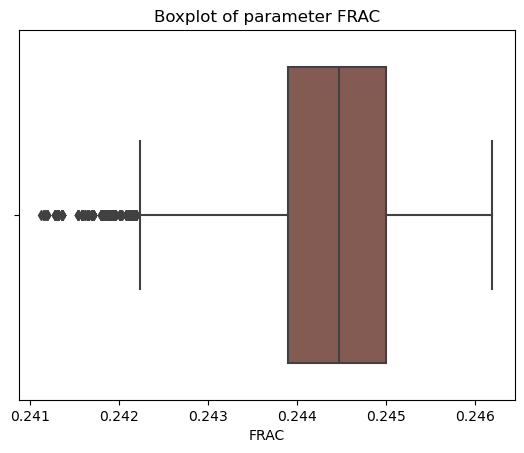

In [9]:
displot(5, samples)
boxplot(5, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



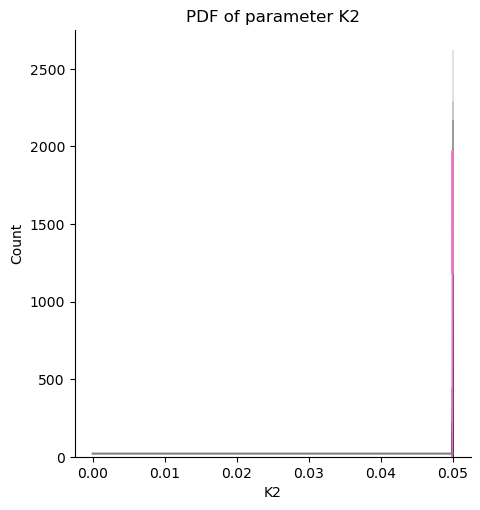

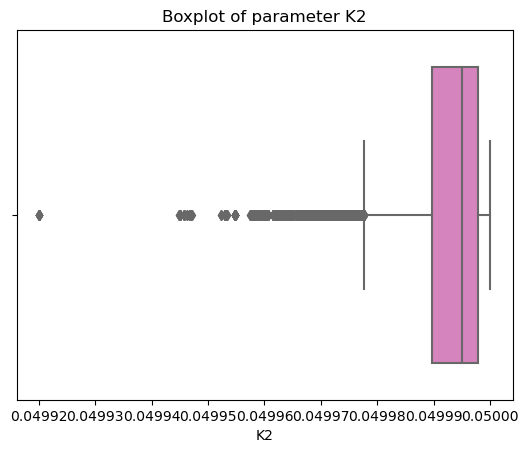

In [10]:
displot(6, samples)
boxplot(6, samples)

# Sampling

In [11]:
# Sampling Max
param_vec = []
for i in range(len(samples.loc[0])):
    values, counts = np.unique(samples.iloc[:, i], return_counts=True)
    ind = np.argmax(counts)
    param_vec.append(values[ind])

_, sampled_max, _, _ = run_model_single_parameter_node(model, param_vec)

[HVBSASK INFO] [0] parameters: [[0.5212632496525881, 0.4939005557214247, 2.9994703324235865, 0.0001914985832858378, 50.007133857945504, 0.24586063390183732, 0.04999999508810008]]


In [12]:
# Mean Sampling from MCMC
sample_param = []
for i in range(7):
    sample_param.append(np.random.choice(samples.iloc[:, i], 1000))
sample_param = np.array(sample_param).T

all_results = []
for _, vec in enumerate(sample_param):
    _, y_model, _, _ = run_model_single_parameter_node(model, np.array(vec))
    all_results.append(y_model)

print(np.array(all_results).shape)
sampled_column_means = np.mean(np.array(all_results), axis=0)

[HVBSASK INFO] [0] parameters: [array([5.28578243e-01, 4.93820693e-01, 2.99912020e+00, 3.37800537e-05,
       5.00013016e+01, 2.45209827e-01, 4.99997686e-02])]
[HVBSASK INFO] [0] parameters: [array([5.29475052e-01, 4.93845323e-01, 2.99892707e+00, 6.36872675e-05,
       5.00101181e+01, 2.44637836e-01, 4.99931798e-02])]
[HVBSASK INFO] [0] parameters: [array([5.29548603e-01, 4.93780405e-01, 2.99863495e+00, 1.89006569e-05,
       5.00039051e+01, 2.44013405e-01, 4.99950450e-02])]
[HVBSASK INFO] [0] parameters: [array([5.29399065e-01, 4.93878571e-01, 2.99972660e+00, 1.12820290e-05,
       5.00048183e+01, 2.43557094e-01, 4.99895287e-02])]
[HVBSASK INFO] [0] parameters: [array([5.28200053e-01, 4.94026804e-01, 2.99822324e+00, 8.84188720e-05,
       5.00020835e+01, 2.44398568e-01, 4.99967492e-02])]
[HVBSASK INFO] [0] parameters: [array([5.28637878e-01, 4.91122429e-01, 2.99890338e+00, 2.09933081e-05,
       5.00025647e+01, 2.43716358e-01, 4.99876017e-02])]
[HVBSASK INFO] [0] parameters: [array([5

In [13]:
# Mean Sampling from Start
sample_param = []
for i in range(7):
    uni = tfp.distributions.Uniform(low=param_lower[i], high=param_upper[i]).sample(1)
    sample_param.append(uni)
sample_param = np.array(sample_param).T

all_results = []
for _, vec in enumerate(sample_param):
    _, y_model, _, _ = run_model_single_parameter_node(model, np.array(vec))
    all_results.append(y_model)

_, _, measured_data, _ = run_model_single_parameter_node(model, np.array(vec))

start_column_means = np.mean(np.array(all_results), axis=0)

[HVBSASK INFO] [0] parameters: [array([3.67175167e+00, 9.62704472e+00, 2.61937323e+00, 2.67168671e-01,
       4.04696450e+02, 8.92554586e-01, 3.74137631e-02])]
[HVBSASK INFO] [0] parameters: [array([3.67175167e+00, 9.62704472e+00, 2.61937323e+00, 2.67168671e-01,
       4.04696450e+02, 8.92554586e-01, 3.74137631e-02])]


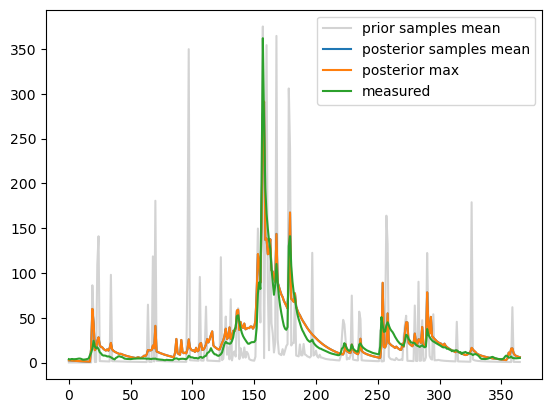

In [14]:
fig = plt.figure()
plt.plot(start_column_means, label="prior samples mean", color="lightgrey")
plt.plot(sampled_column_means, label="posterior samples mean")
plt.plot(sampled_max, label="posterior max")
plt.plot(measured_data, label="measured")
plt.legend()
plt.show()

In [15]:
t = (all_results - measured_data)[0]

s = 0
for i in range(len(t)):
    s += t[i] ** 2
rmse = (s / (len(t))) ** 0.5
rmse

42.66906786662475

In [16]:
t = sampled_max - measured_data

s = 0
for i in range(len(t)):
    s += t[i] ** 2
rmse = (s / (len(t))) ** 0.5
rmse

12.618649347949537

In [17]:
t = np.absolute(sampled_column_means - measured_data)

t.mean()

8.236651381747858

In [18]:
t = np.absolute(sampled_max - measured_data)

t.mean()

8.24779196402528